In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('student-mat.csv', sep=';')

In [23]:
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [25]:
df_categorical = pd.get_dummies(df)

In [26]:
print(df_categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
G1                   395 non-null int64
G2                   395 non-null int64
G3                   395 non-null int64
school_GP            395 non-null uint8
school_MS            395 non-null uint8
sex_F                395 non-null uint8
sex_M                395 non-null uint8
address_R            395 non-null uint8
address_U            395 non-null uint8
famsize_GT3    

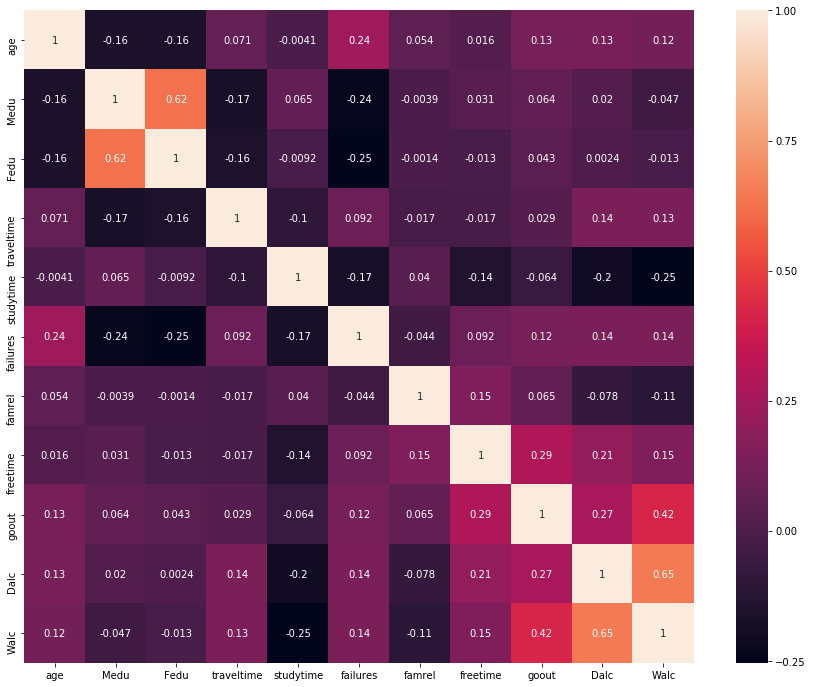

In [27]:
features = list(df_categorical.columns[0:11])

plt.figure(figsize=(15, 12))
sns.heatmap(df_categorical[features].corr(), annot=True)
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
df_categorical.drop(['G1', 'G2', 'G3'], axis=1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [30]:
scaler = StandardScaler().fit(df_categorical)
X_train = scaler.transform(df_categorical)

In [31]:
y_train = pd.read_csv('student-mat.csv', sep=';', usecols=['G3'])

In [32]:
print(y_train.head())

   G3
0   6
1   6
2  10
3  15
4  10


In [33]:
print(y_train.shape)
y_train = y_train.values

(395, 1)


In [34]:
model = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='relu'),
    ])

In [35]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, shuffle=True)

In [37]:
model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
264/264 [==============================] - 0s 786us/sample - loss: 103.4492 - mean_absolute_error: 9.3383
Epoch 2/20
264/264 [==============================] - 0s 295us/sample - loss: 51.8664 - mean_absolute_error: 6.4388
Epoch 3/20
264/264 [==============================] - 1s 2ms/sample - loss: 20.6826 - mean_absolute_error: 3.7193
Epoch 4/20
264/264 [==============================] - 1s 4ms/sample - loss: 11.2985 - mean_absolute_error: 2.5214
Epoch 5/20
264/264 [==============================] - 1s 4ms/sample - loss: 7.2243 - mean_absolute_error: 2.0249
Epoch 6/20
264/264 [==============================] - 0s 1ms/sample - loss: 5.3097 - mean_absolute_error: 1.7492
Epoch 7/20
264/264 [==============================] - 0s 491us/sample - loss: 4.1278 - mean_absolute_error: 1.5192
Epoch 8/20
264/264 [==============================] - 1s 2ms/sample - loss: 3.4166 - mean_absolute_error: 1.3926
Epoch 9/20
264/264 [==============================] - 1s 4ms/sample - loss: 2.8326 - 

In [38]:
print(model.evaluate(X_test, y_test))

131/131 [==============================] - 1s 5ms/sample - loss: 2.8063 - mean_absolute_error: 1.2750
[2.8062920902521555, 1.2749772]


In [39]:
print(y_test[0])

[8]


In [40]:
predictions = model.predict(X_test)
print(predictions[0])

[7.8591228]


In [45]:
from sklearn.metrics import mean_absolute_error

In [49]:
accuracy = accuracy_score(y_test.flatten(), predictions.flatten())
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [50]:
y_test.flatten()

array([ 8, 12, 18, 11,  0, 15, 11, 16, 13, 12, 10,  0, 16, 10,  8,  6, 13,
       11, 14,  0, 17, 11, 10, 15, 12, 12, 17, 15,  9, 10, 20, 10,  8, 10,
       10, 18, 11, 10,  7, 11,  0, 11, 10,  9, 13, 14, 15, 11, 10, 15,  6,
        8, 10, 15,  9, 16, 12, 11, 10, 11,  5, 11, 11, 14, 13, 18, 14, 13,
        0, 14, 12,  0,  9, 12, 16, 11,  9, 10,  5,  8, 11,  5, 18,  7,  9,
       14, 10, 11, 15, 12, 16, 12, 15,  0, 11,  8, 10, 11,  0,  8,  7, 13,
        0, 10, 14, 15, 11, 18, 15, 12,  9,  0, 14, 16, 11, 10, 12, 14, 10,
       15,  9, 11, 10, 17, 11, 11,  6,  7,  9,  0,  6], dtype=int64)

In [51]:
predictions.flatten()

array([ 7.80101   ,  9.993688  , 18.377445  , 13.378209  , -0.        ,
       14.395459  , 10.991504  , 14.527143  , 13.1103945 ,  8.954619  ,
        7.7087955 ,  4.078912  , 15.390691  ,  9.365617  ,  7.534476  ,
        4.6475687 , 10.85629   , 12.150037  , 15.113886  , -0.        ,
       16.86448   ,  9.976937  ,  6.0768766 , 13.827722  , 12.312875  ,
        9.562535  , 18.070698  , 13.80425   ,  7.9483047 , 10.909178  ,
       21.00946   ,  9.190242  ,  8.051337  , 10.234269  ,  8.365878  ,
       17.614847  , 12.8237295 , 10.019314  ,  8.527686  ,  9.8589735 ,
        0.44739112, 11.067097  , 10.057809  ,  8.691569  , 13.487891  ,
       11.580362  , 13.794685  , 12.751782  , 10.463787  , 17.436518  ,
        4.817255  ,  9.813275  , 11.452677  , 12.22368   ,  9.755191  ,
       14.906003  , 12.14187   ,  8.11313   ,  6.84001   ,  9.927584  ,
        2.140624  ,  8.970502  , 11.887537  , 13.796203  , 11.536805  ,
       20.01793   , 13.413348  , 12.56013   ,  2.5807052 , 14.65